## Projeto 3 - Felipe Aron, Eduardo Vaz e Pedro Lopes

### Bitcoin price

#### Introdução

Desde a ascêndencia da criptografia e da computação no final do século XX, as inovações digitais têm modificado a maneira como os índividuos se interagem e como é transmitida a informação. Em 2008, após muito desenvolvimento programacional de seus antecedentes Wei Dai, Adam Back, entre outros, Satoshi Nakamoto publicou o whitepaper do Bitcoin, que viria a se tornar o primeiro passo para a construção de um novo sistema de transações de valor. Foi criada uma ferramenta de armazenamento de dados capaz de construir um sistema descentralizado de validação de transações e requerimento de dados de forma completamente "trustless". Deu-se o nome para essa tecnologia de blockchain, pela forma como é escrita ao longo do tempo.



Começou-se uma nova revolução moedas virtuais chegaram para instaurar um novo modelo de negócio e de transação financeira. Sendo assim, buscamos nesse documento, analisar o movimento de valor de mercado do Bitcoin. Essa análise, vai se basear em buscar e comparar características desse mesmo mercado que possam influenciar no preço da moeda. 

Por exemplo,a quantidade de carteiras ativas em um dia, que seriam como “contas” contendo ou não Bitcoin no mundo todo. Ela pode, de acordo com a hipótese do grupo, representar ou um aumento ou uma diminuição no valor do Bitcoin. O número de transações e a dificuldade de minerar a moeda podem ser, também, fatores de influência no preço da moeda. 

In [49]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [50]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Aron\Documents\Insper\2A - DP\CD\Projeto 3 Bom


Importando os datasets. Vamos trabalhar com número de carteiras ativas, preço do bitcoin, quantidade de transações em um dia e por último um "coeficiente" de dificuldade de mineração, nessa ordem abaixo. 

In [51]:
data_wallets = pd.read_csv('MyWallet.csv',sep=',')
data_price = pd.read_csv('MyPrice.csv',sep=',')
data_transactions = pd.read_csv('MyTransactions.csv',sep=',')
data_difficult = pd.read_csv('MyDifficult.csv',sep=',')

### Adjusting dataframe

Renomeamos a coluna do número de wallet's ativas em um dia para "Number of active BTC wallets in the network"

In [52]:
data_wallets = data_wallets.rename(columns={'Value':"Number of active BTC wallets in the network"})
data_wallets.head()

,Date,Number of active BTC wallets in the network
0,2018-05-23,441615.0
1,2018-05-22,445195.0
2,2018-05-21,369970.0
3,2018-05-20,378135.0
4,2018-05-19,499647.0


Renomeamos a coluna do preço do BTC em U$ para "BTC Price"

In [53]:
data_price = data_price.rename(columns={'Value':'BTC price'})
data_price.head()

,Date,BTC price
0,2018-05-22,8385.556187
1,2018-05-21,8507.406667
2,2018-05-20,8223.288333
3,2018-05-19,8240.055000
4,2018-05-18,8106.118333


Renomeamos a coluna do número de transações na rede BTC em um dia para "Number of transactions"

In [54]:
data_transactions = data_transactions.rename(columns={'Value':'Number of transactions'})
data_transactions.head()

,Date,Number of transactions
0,2018-05-22,202647.0
1,2018-05-21,158663.0
2,2018-05-20,173274.0
3,2018-05-19,211496.0
4,2018-05-18,192683.0


Renomeamos a coluna da difficuldade de mineração de um bloco em um dia para "Minning difficult"

In [55]:
data_difficult = data_difficult.rename(columns={'Value':'Minning difficult'})
data_difficult.head()

,Date,Minning difficult
0,2018-05-22,4.143878e+12
1,2018-05-21,4.143878e+12
2,2018-05-20,4.143878e+12
3,2018-05-19,4.143878e+12
4,2018-05-18,4.143878e+12


Usando o metódo 'concat' juntamos os quatro dataframes ['data_wallets','data_price','data_transactions',data_difficult] em
um único dataframe df_btc com as chaves 'Date' para a data, 'data_price' para o preço, 'data_wallets' para o número de wallets,
'data_transactions' para número de transações na rede em um dia e 'data_difficult' para a dificuldade de mineração de um bloco

In [56]:
df_btc = pd.concat([data_price['Date'],data_price['BTC price'],data_wallets['Number of active BTC wallets in the network'],\
                    data_transactions['Number of transactions'],data_difficult['Minning difficult']],\
                    axis=1, keys=['Date','data_price', 'data_wallets','data_transactions','data_difficult'])

In [57]:
df_btc.describe()

,data_price,data_wallets,data_transactions,data_difficult
count,3427.000000,3.428000e+03,3427.000000,3.427000e+03
mean,994.916249,1.785689e+05,92750.842428,2.487708e+11
std,2580.109131,2.080564e+05,102897.367522,6.848409e+11
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2.580000,6.323750e+03,4536.500000,1.335433e+05
50%,128.000010,7.021100e+04,55836.000000,8.693302e+07
75%,587.345000,3.522185e+05,177866.500000,1.133543e+11
max,19498.683333,1.072861e+06,490644.000000,4.143878e+12


Vamos limpar o dataframe, retirando onde o BTC Price é dado como 0

In [58]:
df_adjusted = df_btc[df_btc.data_price != 0] 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_adjusted)

            Date    data_price  data_wallets  data_transactions  \
0     2018-05-22   8385.556187      441615.0           202647.0   
1     2018-05-21   8507.406667      445195.0           158663.0   
2     2018-05-20   8223.288333      369970.0           173274.0   
3     2018-05-19   8240.055000      378135.0           211496.0   
4     2018-05-18   8106.118333      499647.0           192683.0   
5     2018-05-17   8340.703333      420624.0           208463.0   
6     2018-05-16   8511.458000      455066.0           214779.0   
7     2018-05-15   8652.038333      477898.0           209697.0   
8     2018-05-14   8727.651667      469797.0           158794.0   
9     2018-05-13   8484.346667      364084.0           182054.0   
10    2018-05-12   8468.788000      434890.0           213624.0   
11    2018-05-11   9101.483333      510498.0           208961.0   
12    2018-05-10   9322.041667      465045.0           206579.0   
13    2018-05-09   9228.608333      459142.0           217810.

Um número referência que nos ajuda a calcular os valores é usar o mesmo método da bolsa de valores, em calcular sempre a variação para o dia anterior, como se fosse abertura e fechamento de uma bolsa de valores. Inserimos então como método 'assign' uma coluna para calcular a variação desse valor de bitcoin, usando o metódo 'diff'.

In [59]:
df_btc_adjusted = df_adjusted.assign(DeltaBTCPrice=pd.Series(df_adjusted.data_price.diff().fillna(0).astype(float)).values)    

In [60]:
df_btc_adjusted.DeltaBTCPrice.describe()

count    2837.000000
mean       -2.955756
std       183.541317
min     -2960.991667
25%        -3.625160
50%        -0.005000
75%         1.400000
max      2831.197667
Name: DeltaBTCPrice, dtype: float64

Utilizando novamente o metodo 'assign' vamos usar a mesma lógica anterior para o valor o número de wallets ativas. Como é um valor que praticamente só cresce, como se fosse número de contas de um banco, utilizando a variação na quantidade de wallets de um dia para o outro conseguimos obter novos e importante dados.

In [61]:
df_btc_adjusted_wallets = df_btc_adjusted.assign(DeltaBTCWallets=pd.Series(df_btc_adjusted.data_wallets.diff().fillna(0).astype(float)).values)

In [62]:
df_btc_adjusted_wallets.DeltaBTCWallets.describe() # ---> Number of unique bitcoin addresses used per day.

count      2837.000000
mean       -155.662319
std       35534.014025
min     -257519.000000
25%       -6186.000000
50%          47.000000
75%        9253.000000
max      205184.000000
Name: DeltaBTCWallets, dtype: float64

Novamente utilizamos o metódo para o delta de transações de um dia pro outro

In [63]:
# Com o metódo 'assign' criamos uma nova coluna para o dataframe que calcula o delta do número de transações na rede do BTC
df_btc_adjusted_transactions = df_btc_adjusted_wallets.assign(DeltaBTCTransactions=pd.Series(df_btc_adjusted_wallets.data_transactions.diff().fillna(0).astype(float)).values)

In [64]:
df_btc_adjusted_transactions.DeltaBTCTransactions.describe()

count      2837.000000
mean        -71.305957
std       19661.417198
min     -126959.000000
25%       -4857.000000
50%          38.000000
75%        5344.000000
max      114382.000000
Name: DeltaBTCTransactions, dtype: float64

E por fim, o delta para dificuldade de mineração.

In [65]:
# Com o metódo 'assign' criamos uma nova coluna para o dataframe que calcula o delta da dificuldade de mineração
# de blocos na rede do BTC
df_btc_adjusted_difficult = df_btc_adjusted_transactions.assign(DeltaBTCDifficult=pd.Series(df_btc_adjusted_transactions.data_difficult.diff().fillna(0).astype(float)).values)

In [66]:
df_btc_adjusted_difficult.DeltaBTCDifficult.describe()

count    2.837000e+03
mean    -1.460655e+09
std      1.413606e+10
min     -2.851278e+11
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.894513e+10
Name: DeltaBTCDifficult, dtype: float64

Aqui vamos retirar os itens inválidos

In [67]:
df1 = df_btc_adjusted_difficult.dropna(axis=0, how='any')

## Análise Descritiva

### Dificuldade de minerar X BTC Price

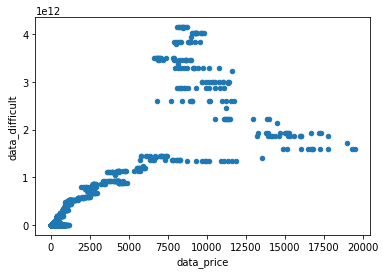

In [68]:
df1.plot.scatter('data_price','data_difficult')

Acima, foi plotado o scatter de Dificuldade de minerar um bitcoin e o preço do bitcoin no dia. Podemos ver que não existe uma curva ou reta muito bem definida. Até por volta de 10 mil dólares esse valor é próximo, mas, a partir de uma certa dificuldade na mineração a curva se perde e os valores ficam bem distintos.

### Transactions X BTC Price

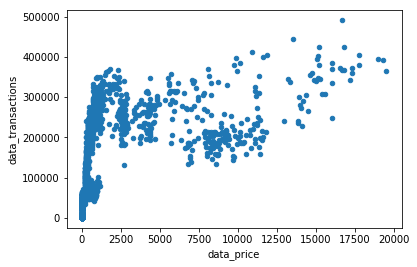

In [69]:
df1.plot.scatter('data_price','data_transactions')

Acima, temos o scatter de Transactions por BTC Price, sendo assim, conseguimos ver que quanto maior o preço do Bitcoin, menos transações são feitas. Uma conclusão um pouco esperada devido aos parâmetros atuais de bolsas de valores. Quando um ativo atinge valores muito altos a facilidade de correlacionar duas variáveis dessas é mais complicado. Com valores baixos, conseguimos ver que a relação é maior, até porque tratando de menos risco, o número de transações também é 'trabalhado' dentro desse risco. 

### Quantidade de carteiras ativas X BTC Price

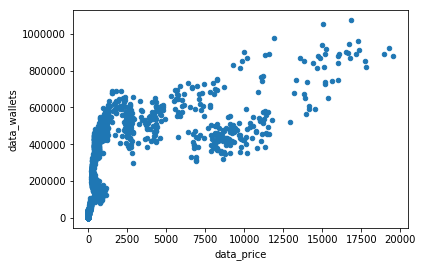

In [70]:
df1.plot.scatter('data_price','data_wallets')

Acima, podemos ver o scatter de quantidades de carteiras ativas e o preço desse bitcoin. Como carteiras ativas é como se fossem "contas de banco", esse valor vai ser praticamente apenas crescente. No caso acima, devemos trabalhar com o delta de wallets, ou seja, vamos trabalhar com a variação na quantidade de carteiras de um dia para o outro, uma analogia à metodologia de bolsas de valores, onde a alta ou baixa de bolsas é referente ao dia anterior.

### Separação teste e treino

Aqui separamos em 75% e 25% a base teste e base treino.

In [71]:
comp = np.random.rand(len(df1)) < 0.75

train = df1[comp]

test = df1[~comp]

## Modelos preditivos

Com o dataframe organizado e com um leque razoável de variáveis para análise realizamos as implementações dos modelos preditivos:

- Modelo de predição pela média

- Modelo de Regressão Linear (Multiple Linear Regression)

### Modelo de predição pela média - Base de treinamento

Usando somente a variável em Y para fazer essa predição que é a média de todos os valores para o preco do BTC entre 2010-08-17 e 2018-05-22 (Year-Month-Day) com a base de treinamento

In [72]:
print("A média dos valores do preço do BTC em U$ é {0}".format(train.data_price.mean()))

A média dos valores do preço do BTC em U$ é 1170.7427879016047


### Modelo de predição pela média - Base de teste

Usando somente a variável em Y para fazer essa predição que é a média de todos os valores para o preco do BTC entre 2010-08-17 e 2018-05-22 (Year-Month-Day) com a base de teste

In [73]:
print("A média dos valores do preço do BTC em U$ é {0}".format(test.data_price.mean()))

A média dos valores do preço do BTC em U$ é 1291.9794761138828


### Modelo de  Regressão linear - Base de treinamento

In [74]:
def linear_regression(a, b):
    m, b, R, p, SEm = linregress(a, b)

    return m, b, R, p

#### Coeficiente em Preço de BTC X Delta de Wallets

In [75]:
# Análise do coeficiente de determinação do preço do BTC em U$ em relação ao Delta do número de wallet's ativas na rede BTC

m, b, R, p = linear_regression(train.data_price,train.DeltaBTCWallets)

In [76]:
Y = train.data_price
X = train.DeltaBTCWallets
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.rsquared

0.00014870377895626063

Como o resultado para o "R-squared" foi próximo a zero podemos pontuar que o Delta de Wallet's ativas na rede BTC não interfere no preço em U$ como tínhamos apontado como uma das hipóteses

#### Coeficiente em Preço de BTC X Delta Transactions

In [77]:
# Análise do coeficiente de determinação do preço do BTC em U$ em relação ao Delta do número de transações em um dia na rede BTC

m, b, R, p = linear_regression(train.data_price,train.DeltaBTCTransactions)

In [78]:
Y = train.data_price
X = train.DeltaBTCTransactions
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.rsquared

0.002615129349375689

Como o resultado para o "R-squared" foi próximo a zero podemos pontuar que o Delta de transações na rede BTC não interfere no preço em U$ como tínhamos apontado como uma das hipóteses.

#### Coeficiente em Preço de BTC X Delta da dificuldade de mineração

In [79]:
# Análise do coeficiente de determinação do preço do BTC em U$ em relação ao Delta da dificuldade de mineração de blocos
# na rede BTC

m, b, R, p = linear_regression(train.data_price,train.DeltaBTCDifficult)

In [80]:
Y = train.data_price
X = train.DeltaBTCDifficult
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.rsquared

0.09240334473998568

Como o resultado para o "R-squared" foi próximo a zero podemos pontuar que o Delta da dificuldade de mineração  de blocos na rede BTC não interfere no preço em U$ como tínhamos apontado como uma das hipóteses. Porém, esse havia sido o maior 'R-squared' atingido portanto fizemos a análise do coeficiente de determinação do valor em relação a dificuldade e chegamos à um alto 'R-squared'

## Coeficiente em BTC Minning Difficult x BTC Active wallet's x BTC Day Transactions x BTC Price

In [81]:
# Análise do coeficiente de determinação do preço do BTC em U$ em relação à dificuldade de mineração de blocos na rede BTC

m, b, R, p = linear_regression(train.data_price,train.data_difficult)

In [82]:
Y = train.data_price
X = train[['data_difficult','data_wallets','data_transactions']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results_ = model.fit()
results_.rsquared

0.7853233375706412

### Explicação BTC Minning Difficult x BTC Active wallet's x BTC Day Transactions x BTC Price

A regressão linear multípla realizada no código acima relaciona as três variáveis que na hipótese do grupo teriam maior influência no preço do BTC em U$, com a variável do preço do BTC. Como obtivemos um R-squared alto, cerca de 0.80 (results_.rsquared), podemos pontuar que essas três variáveis tem grande influência no preço do BTC em cada dia. 

In [90]:
results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     2555.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:38:12   Log-Likelihood:                -17999.
No. Observations:                2099   AIC:                         3.601e+04
Df Residuals:                    2095   BIC:                         3.603e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -197.6901     41.344     -4.782      0.000    -278.770    -116.610
data_difficult     2.501e-09   4.91e-11     50.939      0.000    2.41e-09     2.6e-09
data_wallets          0.0116      0.001     19.977      0.000       0.011       0.013
data_transactions    -0.0166      0.001    -14.867      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     1662.983   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55142.601
Skew:                           3.467   Prob(JB):                         0.00
Kurtosis:                      27.133   Cond. No.                     1.15e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Com os coeficientes de correlação das variáveis 'data_difficult', 'data_wallets' e 'data_transactions' e verificando que o valor-p das três variáveis é zero, ou próximo de, pudemos construir as seguinte relações para cada variável com o preço do BTC em U$.

- A cada 1000 wallet's ativas a mais o preço do BTC aumenta em U$$ 11,6. A cada 1000 wallet's ativas a menos o preço do BTC diminuiu em U$ 11,6

- A cada 1000 transactions a mais no dia o preço do BTC diminui em U$$ 16,6. A cada 1000 transactions a mais no dia o preço do BTC aumenta em U$ 16,6

### Caso peculiar da dificuldade de mineração do BTC e a relação com o preço

In [84]:
Y = train.data_price
X = train.data_difficult
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.rsquared

0.7197439236885447

Observamos que o R-squared da regressão linear entre a váriavel 'data_price' (preço do BTC) e a variável 'data_difficult' (dificuldade de mineração de um bloco) foi muito alto e parecia explicar muito do preço do BTC. Mas ao observarmos o seu coeficiente dessa váriavel 'data_difficult' no summary do modelo OLS (2.501e-09) percebemos que ou o modelo não tem capacidade para interpretar a relação existente entre o preço e a dificuldade de mineração, ou simplesmente o 'data_difficult' não explica muito o preço do BTC, o que parece contraditório uma vez que o R-squared entre essas duas variáveis foi de (results.rsquared) 0.7197439236885447

### RMS

In [85]:
def rms(yi,fi):
    return np.sqrt(((yi-fi) ** 2).mean())

In [86]:
# Running RMS

yI = results.predict(X)

fI = train.data_price

run_rms = rms(yI,fI)

print(("O valor do RMS para a base de treinamento é {0}".format(run_rms)))

O valor do RMS para a base de treinamento é 1464.4964187698274


### Predição com os resultados da  regressão linear na base de treinamento - Base de teste

In [108]:
X = test[['data_difficult','data_wallets','data_transactions']]
X = sm.add_constant(X)

predictX = results_.predict(X)

predictX.head()

5     11606.470715
6     11902.716160
14    12057.572196
19    12183.829243
26    11488.311191
dtype: float64

In [107]:
test.data_price.head()

5     8340.703333
6     8511.458000
14    9345.690000
19    9221.426000
26    8995.506667
Name: data_price, dtype: float64

O modelo preditivo não se saiu muito bem uma vez que em algums pontos a diferença entre o preço gerado pela predição e o real preço foi alto. Além disso a partir de certa parte da predição o preço do BTC fica menor que 0, o que não pode ser verdadeiro.

### RMS

In [88]:
# Running RMS para a base de teste

yI = results_.predict(X)

fI = test.data_price

run_rms = rms(yI,fI)

print(("O valor do RMS para a base de teste é {0}".format(run_rms)))

O valor do RMS para a base de teste é 1209.8478307108626


## Underfitting e Overfitting

Os conceitos de 'underfitting' e 'overfitting' servem para analisar e tirar uma conclusão do algoritimo. Basicamente ele vai avaliar se o algoritimo está bem treinado para aplicar na base teste. Um dos referenciais para chegar nessa conclusão é o R2. Esse valor, se estiver próximo na base treino e na base teste representa um bom modelo de predição. Por outro lado, se esse valor é muito discrepante pode representar um modelo pobre de análise com uma base teste. 

No caso discrito aqui, os dois valores de R2 em Treino e Teste ficaram extremamente próximos, nesse caso, o conceito de Overfitting que aparece. É o termo para representar um modelo rico em questão de análise dos dados. 

## Conclusão

Após a análise descritiva das variáveis e a implementação dos modelos preditivos (pela média e pela regressão linear simples e múltipla) pudemos verificar que uma boa parte da 'explicação' do preço do BTC em cada dia se deve à dificuldade de mineração de um bloco, isto pelo fato do R-squared entre essas duas variáveis dar maior que 0.7, indicando alta correlação. Quando realizada a regressão múltipla das variáveis número de transações em um dia, número de carteiras ativas em um dia e a dificuldade de mineração em um dia com o preço pudemos verificar um aumento de mais ou menos 10% com relação a regressão linear simples da váriavel preço e dificuldade de mineração verificando a existência de alguma correlação entre as váriaveis wallet's ativas e número de transações em um dia. A partir dos "Beta's" dessas variáveis obtido pelo OLS pudemos chegar a uma relação linear entre o número de wallet's ativas e o preço e entre o número de transações e o preço que segue:

- A cada 1000 wallet's ativas a mais o preço do BTC aumenta em (BetaCorrelaçãoWallet'sPrice*1000)  U$$. A cada 1000 wallet's ativas a menos o preço do BTC diminuiu em (BetaCorrelaçãoWallet'sPrice*1000) U$

- A cada 1000 transactions a mais no dia o preço do BTC diminui em U$$(BetaCorrelaçãoTransactionsPrice*1000). A cada 1000 transactions a mais no dia o preço do BTC aumenta em U$(BetaCorrelaçãoTransactionsPrice*1000)

O resultado do RMS deu muito acima do esperado o que provalmente comprova a ineficiência do modelo preditivo para o preço do BTC. Porém, o RMS da base de teste e da base de treinamento deram próximos o que parece pontuar algum resultado do modelo preditivo mesmo que não satisfatório.

O intuito deste trabalho além de estudar como as variáveis do sistema BTC afetam no preço do BTC é desmistificar a tecnologia blockchain, utilizando os conceitos (wallet's, dificuldade de mineração, blocos) e abrindo novas portas para o estudo dessa nova tecnologia que tem muito potencial disruptivo na sociedade.

O grupo tem muita intuição que o preço do BTC seja afetado por fatores externos ao sistema não estudados nesse trabalho, como por exemplo, notícias ruins acerca da tecnologia conhecida como FUD (fear, uncertain and doubt)e influenciado por notícias boas FOMO (fear of missing out). Além disso, nesse mercado existe muita manipulação, pois é muito fácil manipular os mercados com pouca liquidez e volume.